In [ ]:
# !pip install -U spacy
!python -m spacy download en_core_web_md

In [28]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS


In [5]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = 'data/data_clean_en_2.csv'

In [6]:
df = pd.read_csv(DATA_PATH)
df = df[df['language'] != 'other']


In [7]:
# remove the rows where lyrics_clean is empty or nan
df = df[df['lyrics_clean'].notna()]

In [8]:
df.columns

Index(['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics', 'id',
       'language', 'yearx', 'lyrics_clean', 'lyrics_clean_with_newline'],
      dtype='object')

In [20]:
# get rows where "Taylor Swift" is in artist column
TaylorSwift_df = df[df['artist'].str.contains('Taylor Swift')]
eminem_df = df[df['artist'].str.contains('Eminem')]
# TaylorSwift_df.to_csv("taylorSwift_data.csv")

In [24]:

def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in STOP_WORDS])
    return text

# remove punctuations
def remove_punctuations(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

#remove numbers both 123
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

def preprocess_text(text, remove_newline=True):
    text = remove_stopwords(text)
    text = remove_punctuations(text)
    text = remove_numbers(text)
    if remove_newline:
        text = text.replace('\n', '')
    # strip text
    text = text.strip()
    return text

In [25]:
#get the unique words percentage from the column "lyrics_clean"
def get_unique_words_percentage_old(lyrics_list):
    '''
    @args : 
        lyrics_list: list [str] : list of lyrics
    @returns:
        percentage of unique words in the lyrics
    '''

    # get all the unique words in all the lyrics
    unique_words = set()
    total_words = 0
    for lyrics in lyrics_list:
        lyrics_processed = preprocess_text(lyrics)
        try:
            unique_words.update(lyrics_processed.split())
            total_words += len(lyrics_processed.split())
        except:
            print("Lyrics caused problem : ", lyrics_processed)

    # get the percentage of unique words
    return (len(unique_words) / total_words) * 100

In [30]:
get_unique_words_percentage_old(TaylorSwift_df["lyrics_clean_with_newline"])

9.822057460611678

In [45]:
# keep the songs in TaylorSwift_df whose yearx is between 1900 and 2024
TaylorSwift_df = TaylorSwift_df[(TaylorSwift_df['yearx'] >= 1900) & (TaylorSwift_df['yearx'] <= 2024)] 

In [49]:
# get the longest word used in all of the values in the lyrics_clean column

# get all the unique words in the lyrics_clean column
unique_words = set()
for row in TaylorSwift_df['lyrics_clean']:
    for word in row.split():
        # replace the hyphens with spaces and add the words to the set
        word = word.replace('-', ' ')
        # if there is space in the word, split it and add the words to the set
        if ' ' in word:
            for w in word.split():
                unique_words.add(w)

        else:
            unique_words.add(word)


# get the longest word in the set
longest_word = ''
for word in unique_words:
    if len(word) > len(longest_word):
        longest_word = word
longest_word

'Miscommunications'

In [11]:
eminem = df[df['artist'].str.contains('Eminem')]


In [35]:
# count the number of times curse words appear in the lyrics
curse_words = ["fuck", "shit", "bitch", "anal", "ass", "shitbag", "asshole", "bastard", "damn", "bollocks"]

def count_curse_words(lyrics , curse_words):
    '''
    given a list of strings as lyrics and a list of strings for curse_words,
    return the count of every curse word which has appeared.
    return variable should be a dictionary where key will be the curse word and value will be its count    
    '''
    curse_word_counts = {curse_word: 0 for curse_word in curse_words}

    for lyric in lyrics:
        words = lyric.split()
        
        for word in words:
            if word.lower() in curse_words:
                curse_word_counts[word.lower()] += 1
    # dont return the items which are zero
    curse_word_counts = {word: count for word, count in curse_word_counts.items() if count > 0}

    curse_word_counts = dict(sorted(curse_word_counts.items(), key=lambda item: item[1], reverse=True))

    return curse_word_counts

In [36]:
lyrics = TaylorSwift_df['lyrics_clean'].tolist()
count_curse_words(lyrics, curse_words)

{'damn': 10, 'shit': 9, 'fuck': 3, 'bitch': 1}

In [49]:
def get_decades(df):
    # return a dictionary with the decades as keys and "views" from column views as values
    # get the years from the column yearx
    years = df['yearx'].tolist()
    # get the views from the column views
    views = df['views'].tolist()
    # create a dictionary with decades as keys and views as values
    decades = {}
    for i in range(len(years)):
        decade = years[i] // 10 * 10
        if decade in decades:
            decades[decade] += views[i]
        else:
            decades[decade] = views[i]

    # use the convert_to_thousands to convert the values into thousands, millions, billions, etc.
    # for key in decades:
    #     decades[key] = convert_to_thousands(decades[key])
        
    return decades


def convert_to_thousands(number):
    if number < 1000:
        return str(number)
    elif number < 1000000:
        return str(number // 1000) + 'K'
    elif number < 1000000000:
        return str(number // 1000000) + 'M'
    else:
        return str(number // 1000000000) + 'B'

In [50]:
get_decades(TaylorSwift_df)

{2010: 49421076, 2000: 4168380, 2020: 45561642}

In [25]:
# remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# remove punctuations
def remove_punctuations(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

#remove numbers both 123
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

def preprocess(text):
    text = remove_stopwords(text)
    text = remove_punctuations(text)
    text = remove_numbers(text)
    return text

In [30]:
#get the unique words percentage from the column "lyrics_clean"
def get_unique_words_percentage(lyrics_list):
    '''
    @args : 
        lyrics_list: list [str] : list of lyrics
    @returns:
        percentage of unique words in the lyrics
    '''

    # get all the unique words in all the lyrics
    unique_words = set()
    total_words = 0
    for lyrics in lyrics_list:
        lyrics_processed = preprocess(lyrics)
        try:
            unique_words.update(lyrics_processed.split())
            total_words += len(lyrics_processed.split())
        except:
            print("Lyrics caused problem : ", lyrics_processed)

    # get the percentage of unique words
    return (len(unique_words) / total_words) * 100

In [31]:
# get all the lyrics of taylor swift in list
temp_df = df[df['artist'].str.contains('Taylor Swift')]

lyrics_list = temp_df['lyrics_clean'].tolist()
get_unique_words_percentage(lyrics_list)

8.900982565256228

In [21]:
# get all the lyrics of taylor swift in list
temp_df = df[df['artist'].str.contains('Eminem')]

lyrics_list = temp_df['lyrics_clean'].tolist()
get_unique_words_percentage(lyrics_list)

10.460270570034853

In [32]:
famous_artists = ["Drake", "Eminem", "Kanye West", "Taylor Swift", "Selena Gomez", "Dua Lipa", "Ariana Grande", "Justin Bieber", "Billie Eilish",
                  "Lady Gaga", "Adele" , "Britney Spears", "Katy Perry" , "Ed Sheeran", "Rihanna", "Bruno Mars", "Bruno Mars",
                  "Demi Lovato", "Miley Cyrus", "Jennifer Lopez", "Charlie Puth"]

#get_unique_words_percentage of all the famous artists
unique_words_percentage = {} #key will be the name of the artist and value will be the percentage of unique words
for artist in famous_artists:
    temp_df = df[df['artist'].str.contains(artist)]
    lyrics_list = temp_df['lyrics_clean'].tolist()
    unique_words_percentage[artist] = get_unique_words_percentage(lyrics_list)




In [33]:
unique_words_percentage

{'Drake': 10.22452173357606,
 'Eminem': 11.228101417981879,
 'Kanye West': 10.225898442749005,
 'Taylor Swift': 8.900982565256228,
 'Selena Gomez': 12.352805356730547,
 'Dua Lipa': 12.282274590163935,
 'Ariana Grande': 9.372429348547168,
 'Justin Bieber': 10.138736235250203,
 'Billie Eilish': 19.315188762071994,
 'Lady Gaga': 12.62865190856235,
 'Adele': 15.288220551378446,
 'Britney Spears': 10.839131172577634,
 'Katy Perry': 16.724279835390945,
 'Ed Sheeran': 12.533447770990053,
 'Rihanna': 10.189822172909107,
 'Bruno Mars': 14.881841342352631,
 'Demi Lovato': 12.295719844357976,
 'Miley Cyrus': 13.699709459792189,
 'Jennifer Lopez': 13.7482019834961,
 'Charlie Puth': 13.028993336934992}

In [5]:
df.columns

Index(['Unnamed: 0', 'title', 'tag', 'artist', 'year', 'views', 'features',
       'lyrics', 'id', 'language', 'yearx', 'lyrics_clean'],
      dtype='object')

In [11]:
# get which "artist" has the most "views"
# draw a table

df.groupby('artist')['views'].sum().sort_values(ascending=False).head(10)

artist
Drake                          289846623
Eminem                         199693351
Kanye West                     164935386
Genius English Translations    150653390
Kendrick Lamar                 148283602
The Weeknd                     118636595
Taylor Swift                    98384074
J. Cole                         95276882
XXXTENTACION                    90767718
Ariana Grande                   73867181
Name: views, dtype: int64

In [12]:
# get which "artist" appears the most
df.groupby('artist')['artist'].count().sort_values(ascending=False).head(10)
# drake = 417
# eminem = 365
# Kanye West = 348
# taylor swift = 268

artist
Genius English Translations    1994
Juice WRLD                      573
Lil Wayne                       551
Drake                           417
Genius Romanizations            394
Eminem                          365
Chris Brown                     365
Chief Keef                      354
YoungBoy Never Broke Again      350
Kanye West                      348
Name: artist, dtype: int64

<AxesSubplot:ylabel='tag'>

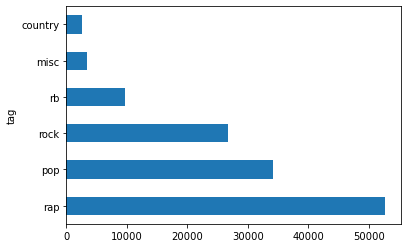

In [14]:
#plot which tag appears the most
df.groupby('tag')['tag'].count().sort_values(ascending=False).head(10).plot(kind='barh')

In [86]:
# filter the rows in which "Sheeran" appears inside the "artist" column
df[df['artist'].str.contains('Puth')].head(2)

,Unnamed: 0,title,tag,artist,year,views,features,lyrics,id,language,yearx,lyrics_clean
41745,42232,Kiss Me,pop,Charlie Puth,2013,46839,{},[Verse 1]\nI should have told you how I really...,571036,en,2013,I should have told you how I really feel A li...
44566,45214,Marvin Gaye,pop,Charlie Puth,2015,571624,"{""Meghan Trainor""}",[Intro: Charlie Puth]\nLet's Marvin Gaye and g...,706298,en,2015,Let's Marvin Gaye and get it on You got the h...


In [87]:
# get all the unique values of "tag" column for the artist 
#
# do it  "Drake", "Eminem", "Kanye West", "Taylor Swift", "Selena Gomez", "Dua Lipa", "Ariana Grande", "Justin Bieber", "Billie Eilish",
# and "Lady Gaga", "Adele" , "Britney Spears", "Katy Perry" , "Ed Sheeran", "Rihanna", "Bruno Mars", "Bruno Mars",
# "Demi Lovato", "Miley Cyrus", "Jennifer Lopez", "Charlie Puth"


# also get the counts of each tag
# check if the artist contains these artist names.

print("Drake songs distribution : \n", df[df['artist'].str.contains('Drake')]['tag'].value_counts() )

print("Eminem songs distribution : \n", df[df['artist'].str.contains('Eminem')]['tag'].value_counts() )

print("Kanye West songs distribution : \n", df[df['artist'].str.contains('Kanye West')]['tag'].value_counts() )

print("Taylor Swift songs distribution : \n", df[df['artist'].str.contains('Taylor Swift')]['tag'].value_counts() )

print("Selena Gomez songs distribution : \n", df[df['artist'].str.contains('Selena Gomez')]['tag'].value_counts() )

print("Dua Lipa songs distribution : \n", df[df['artist'].str.contains('Dua Lipa')]['tag'].value_counts() )

print("Ariana Grande songs distribution : \n", df[df['artist'].str.contains('Ariana Grande')]['tag'].value_counts() )

print("Justin Bieber songs distribution : \n", df[df['artist'].str.contains('Justin Bieber')]['tag'].value_counts() )

print("Billie Eilish songs distribution : \n", df[df['artist'].str.contains('Billie Eilish')]['tag'].value_counts() )

print("Lady Gaga songs distribution : \n", df[df['artist'].str.contains('Lady Gaga')]['tag'].value_counts() )

print("Adele songs distribution : \n", df[df['artist'].str.contains('Adele')]['tag'].value_counts() )

print("Britney Spears songs distribution : \n", df[df['artist'].str.contains('Britney Spears')]['tag'].value_counts() )

print("Katy Perry songs distribution : \n", df[df['artist'].str.contains('Katy Perry')]['tag'].value_counts() )

print("Ed Sheeran songs distribution : \n", df[df['artist'].str.contains('Ed Sheeran')]['tag'].value_counts() )

print("Rihanna songs distribution : \n", df[df['artist'].str.contains('Rihanna')]['tag'].value_counts() )

print("Bruno Mars songs distribution : \n", df[df['artist'].str.contains('Bruno Mars')]['tag'].value_counts() )

print("Demi Lovato songs distribution : \n", df[df['artist'].str.contains('Demi Lovato')]['tag'].value_counts() )

print("Miley Cyrus songs distribution : \n", df[df['artist'].str.contains('Miley Cyrus')]['tag'].value_counts() )

print("Jennifer Lopez songs distribution : \n", df[df['artist'].str.contains('Jennifer Lopez')]['tag'].value_counts() )

print("Charlie Puth songs distribution : \n", df[df['artist'].str.contains('Charlie Puth')]['tag'].value_counts() )



Drake songs distribution : 
 rap     420
rb       28
rock     23
pop      21
misc      5
Name: tag, dtype: int64
Eminem songs distribution : 
 rap     375
misc      9
Name: tag, dtype: int64
Kanye West songs distribution : 
 rap     340
misc     19
pop      14
rb       10
Name: tag, dtype: int64
Taylor Swift songs distribution : 
 pop        125
country    124
misc        18
rap          1
rock         1
Name: tag, dtype: int64
Selena Gomez songs distribution : 
 pop     78
rock     3
rb       2
Name: tag, dtype: int64
Dua Lipa songs distribution : 
 pop    65
rap     1
Name: tag, dtype: int64
Ariana Grande songs distribution : 
 pop    110
rb      42
rap      2
Name: tag, dtype: int64
Justin Bieber songs distribution : 
 pop        149
rb          40
rap          7
misc         1
country      1
Name: tag, dtype: int64
Billie Eilish songs distribution : 
 pop     71
rock     3
rb       1
misc     1
Name: tag, dtype: int64
Lady Gaga songs distribution : 
 pop        115
rock         5
r

In [88]:
# filter out songs from these artists:
# "Drake", "Eminem", "Kanye West", "Taylor Swift", "Selena Gomez", "Dua Lipa", "Ariana Grande", "Justin Bieber", "Billie Eilish"

# Didnt do "Drake", "Eminem", "Kanye West", for now
pop_famous_artists = ["Taylor Swift", "Selena Gomez", "Dua Lipa", "Ariana Grande", "Justin Bieber", "Billie Eilish",
                      "Lady Gaga", "Adele" , "Britney Spears", "Katy Perry" , "Ed Sheeran", "Rihanna", "Bruno Mars",
                      "Demi Lovato", "Miley Cyrus", "Jennifer Lopez", "Charlie Puth"]

# get the rows in which the artist is in the list above and tag is pop
df_pop = df[(df['artist'].isin(pop_famous_artists)) & (df['tag'] == 'pop')]
df_pop.shape

(1315, 12)

In [24]:
# get the average number of words in "lyrics clean" for each popular artist drake, eminem, kanye, taylor
# plot it
print("Average number of words in : ")
print(" Drake : ", drake['lyrics_clean'].str.split().str.len().mean())
print(" Eminem : ", eminem['lyrics_clean'].str.split().str.len().mean())
print(" Kanye : ", kanye['lyrics_clean'].str.split().str.len().mean())
print(" Taylor : ", taylor['lyrics_clean'].str.split().str.len().mean())


Average number of words in : 
 Drake :  496.6091127098321
 Eminem :  727.1181318681319
 Kanye :  527.6685878962536
 Taylor :  361.3619402985075


In [ ]:
taylor = df[df['artist'] == 'Taylor Swift']
drake = df[df['artist'] == 'Drake']
eminem = df[df['artist'] == 'Eminem']
kanye = df[df['artist'] == 'Kanye West']


pop = df[df['tag'] == 'pop']
rap = df[df['tag'] == 'rap']


In [43]:
for i in tqdm( range( 0, df_en.shape[0] ) ):
    if i <= 1360 : #total batches done * 20
      batch_number = 69
      continue

    # check if the df_en.iloc[i]['artist'] contains one of the pop_famous_artists
    if df_en.iloc[i]['artist'] in pop_famous_artists:
        print("found one")
        continue

,Unnamed: 0,title,tag,artist,year,views,features,lyrics,id,language,yearx,lyrics_clean
15672,15706,Put Your Hearts Up,pop,Ariana Grande,2011,23770,{},"[Intro]\nLet me see you put your hearts up, ye...",93347,en,2011,"Let me see you put your hearts up, yeah Let m..."
16202,16242,Daydreamin,pop,Ariana Grande,2013,125117,{},[Verse 1]\nYou walked in\nCaught my attention\...,97794,en,2013,You walked in Caught my attention I've never ...
16203,16243,VOODOO LOVE,pop,Ariana Grande,2016,18845,{},[Verse 1]\nI wanna mix a potion up\nMake a spe...,97789,en,2016,I wanna mix a potion up Make a special drink ...
17287,17331,Baby Its Cold Outside,pop,Larry Lovestein & Ariana Grande,2012,50047,{},[Verse 1: Larry Lovestein & Ariana Grande]\nI ...,104999,en,2012,"I really can't stay, but baby it's cold outsi..."
19199,19259,Honeymoon Avenue,pop,Ariana Grande,2013,236596,{},[Intro: Ariana Grande & Leon Thomas III]\nShoo...,119682,en,2013,"Shoo-doo-doo-dum-doo, da-da Shoo-doo-doo-dum-..."
...,...,...,...,...,...,...,...,...,...,...,...,...
125600,171273,Save Your Tears Remix,pop,Ariana Grande & The Weeknd,2021,652326,{},[Intro: The Weeknd & Ariana Grande]\nOoh (Ooh)...,6722709,en,2021,"Ooh (Ooh) Na-na, yeah I saw you dancing in ..."
126115,174279,Rain On Me Arca Remix,pop,Lady Gaga & Ariana Grande,2021,13063,{Arca},"[Intro: Ariana Grande]\n(Rain on me, rain on m...",6835118,en,2021,"(Rain on me, rain on me) Rain on me Rain on m..."
127860,180902,Santa Can’t You Hear Me,pop,Kelly Clarkson & Ariana Grande,2021,23474,{},"[Verse 1: Kelly Clarkson, Ariana Grande]\nKeep...",7222324,en,2021,Keep the snow and sleigh rides Keep those sil...
128157,181801,​you Sweetener Outtake,rb,Ariana Grande,2018,18989,{},[Verse 1]\nRemember when you disappeared? (Yuh...,7296584,en,-1,Remember when you disappeared? (Yuh) I couldn...


In [25]:
# count many occurences for each of these 4 aritsts
print("The number of songs for each artist : ")
print(" Drake : ", drake['artist'].count())
print(" Eminem : ", eminem['artist'].count())
print(" Kanye : ", kanye['artist'].count())
print(" Taylor : ", taylor['artist'].count())



The number of songs for each artist : 
 Drake :  417
 Eminem :  365
 Kanye :  348
 Taylor :  268


In [37]:
print("The columns of the dataset are: ", df.columns)

print("The shape of the dataset is: ", df.shape)

The columns of the dataset are:  Index(['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics', 'id',
       'language'],
      dtype='object')
The shape of the dataset is:  (189840, 9)


In [48]:
# get the column lyrics 
lyrics = df['lyrics'].tolist()

print("Sample Lyrics before cleaning : \n\n ")
print(lyrics[0])


Sample Lyrics before cleaning : 

 
[Chorus: Opera Steve & Cam'ron]
Killa Cam, Killa Cam, Cam
Killa Cam, Killa Cam
Killa Cam, Cam
Killa Cam, Killa Cam, Cam
Killa Killa Killa Cam
Killa Cam, Cam, Killa (Killa!)
Killa Cam, Killa Cam, Cam (Bases loaded)
Killa Cam, Killa Cam (Uh-huh)
Killa Cam, Cam (Santana on second, Jim on third)
Killa Cam, Killa Cam, Cam (I'm at bat)
Killa Killa Killa Cam
Killa Cam, Cam, Killa (I'm 'bout to hit this shit out the world)
Killa Cam (Ugh, Heatmakerz), Killa Cam, Cam
Killa Cam, Killa Cam
Killa Cam, Cam (Hahahaha)
Killa Cam, Killa Cam, Cam
Killa Killa Killa Cam
Killa Cam, Cam, Killa (We  make this shit clap)
Killa Cam, Killa Cam, Cam
Killa Cam, Killa Cam
Killa Cam, Cam
Killa Cam, Killa Cam, Cam
Killa Killa Killa Cam (Killa! Killa!)
Killa Cam, Cam, Killa
[Verse 1]
With the goons I spar, stay in tune with ma (What up?)
She like, "Damn, this the realest since 'Kumbaya'"
Bomaye, Killa Cam, my Lord (My Lord)
Still the man with the pan, scrilla, fam, on board
Now bi

In [43]:
# loop through each lyrics. and remove everything inside the [] :
# remove the [] and the content inside it
# also add space befpre every \n

def clean_lyrics_string(one_lyric_string):
    global x
    x+=1
    try:
        one_lyric_string_cleaned = re.sub(r'\[.*?\]', '', one_lyric_string)
        one_lyric_string_cleaned = one_lyric_string_cleaned.replace('\n', ' \n')
        # remove the \n at the end of the string and at the start of the string
        one_lyric_string_cleaned = one_lyric_string_cleaned.strip()

        return one_lyric_string_cleaned
    except:
        print("I AM HERE ")
        print(type(one_lyric_string))
        print(one_lyric_string)
        print(x)
        print("----------------------------")

In [40]:
global x
x=0 

In [44]:
# clean every lyrics string in df using the function clean_lyrics_string() and save it in a new column named lyrics_cleaned
df['lyrics_cleaned'] = df['lyrics'].apply(clean_lyrics_string)

In [45]:
df.head(1)

,title,tag,artist,year,views,features,lyrics,id,language,lyrics_cleaned
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,"Killa Cam, Killa Cam, Cam \nKilla Cam, Killa C..."


In [47]:
lyrics_cleaned = df['lyrics_cleaned'].tolist()

print("Sample Lyrics after cleaning : \n\n ")
print(lyrics_cleaned[0])

Sample Lyrics after cleaning : 

 
Killa Cam, Killa Cam, Cam 
Killa Cam, Killa Cam 
Killa Cam, Cam 
Killa Cam, Killa Cam, Cam 
Killa Killa Killa Cam 
Killa Cam, Cam, Killa (Killa!) 
Killa Cam, Killa Cam, Cam (Bases loaded) 
Killa Cam, Killa Cam (Uh-huh) 
Killa Cam, Cam (Santana on second, Jim on third) 
Killa Cam, Killa Cam, Cam (I'm at bat) 
Killa Killa Killa Cam 
Killa Cam, Cam, Killa (I'm 'bout to hit this shit out the world) 
Killa Cam (Ugh, Heatmakerz), Killa Cam, Cam 
Killa Cam, Killa Cam 
Killa Cam, Cam (Hahahaha) 
Killa Cam, Killa Cam, Cam 
Killa Killa Killa Cam 
Killa Cam, Cam, Killa (We  make this shit clap) 
Killa Cam, Killa Cam, Cam 
Killa Cam, Killa Cam 
Killa Cam, Cam 
Killa Cam, Killa Cam, Cam 
Killa Killa Killa Cam (Killa! Killa!) 
Killa Cam, Cam, Killa 
 
With the goons I spar, stay in tune with ma (What up?) 
She like, "Damn, this the realest since 'Kumbaya'" 
Bomaye, Killa Cam, my Lord (My Lord) 
Still the man with the pan, scrilla, fam, on board 
Now bitches, they w